In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap

In [4]:
# load data
df = pd.read_csv("../data/processed/contra_contacts_processed.csv")
df.drop(columns=["DATE", "AGE_CATEGORY"], inplace=True)
df.head()

,AGE,DURATION_MIN,CONTACT_COUNT_TOTAL,SYMPTOMATIC,SYMPTOM_COUNT
0,21.0,17.8,5,True,4
1,86.0,9.3,0,False,0
2,12.0,6.5,3,False,0
3,93.0,2.6,0,False,0
4,24.0,9.1,4,True,3


In [5]:
# load model
model = xgb.XGBRegressor()
model.load_model("../models/model.json")

In [6]:
# setting seed
seed = 42

# define target and predictor columns
target_col = "CONTACT_COUNT_TOTAL"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [7]:
# intialize shap
shap.initjs()

In [8]:
# calculate shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

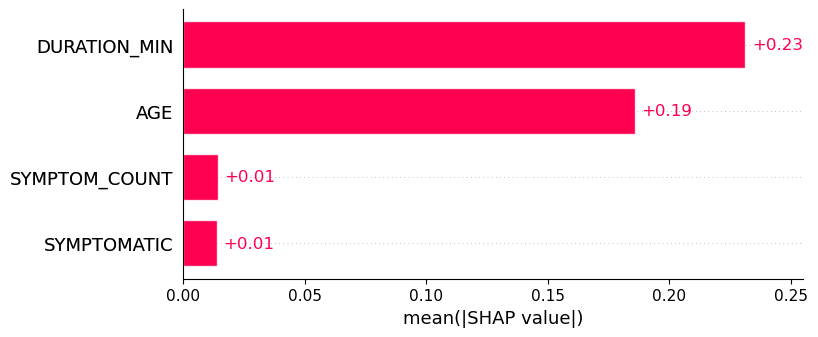

In [12]:
# mean shap values for each feature
shap.plots.bar(shap_values, show=False)
plt.savefig(
    "../reports/figures/mean_shap.png", format="png", dpi=600, bbox_inches="tight"
)

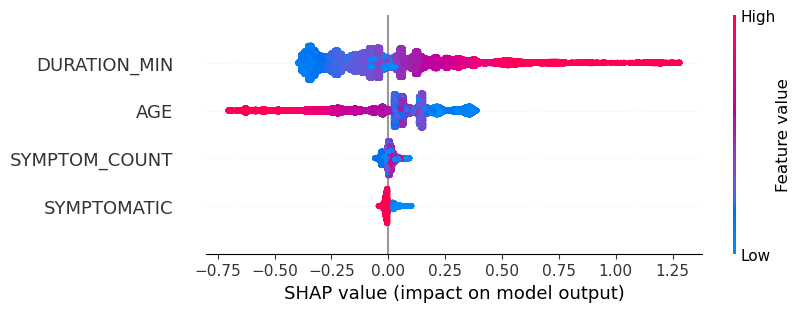

In [13]:
# beeswarm plot
shap.plots.beeswarm(shap_values, show=False)
plt.savefig(
    "../reports/figures/beeswarm_shap.png", format="png", dpi=600, bbox_inches="tight"
)